In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(style='whitegrid')


In [5]:
conn = sqlite3.connect('adventure works new.db')

In [7]:
def run_query(query):
    return pd.read_sql_query(query,conn)

In [13]:
query = '''
SELECT TerritoryKey, Region, SUM(OrderValue) AS TotalSales
FROM Demographics_update
GROUP BY TerritoryKey
'''

In [15]:
territory_sales_data = run_query(query)

In [17]:
territory_sales_data.head()

,TerritoryKey,Region,TotalSales
0,1,United States NorthWest,3095074.30
1,2,United States NorthEast,6401.56
2,3,United States Central,3143.06
3,4,United States SouthWest,4822794.68
4,5,United States SouthEast,11585.63


In [19]:
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc

In [21]:
territory_groups = [territory_sales_data[territory_sales_data['TerritoryKey'] ==tid]['TotalSales'] for tid in territory_sales_data['TerritoryKey'].unique()]
anova_result = f_oneway(*territory_groups)
print(f"ANOVA F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

ANOVA F-statistic: nan, p-value: nan


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


In [23]:
for tid in territory_sales_data['TerritoryKey'].unique():
    sales_data = territory_sales_data[territory_sales_data['TerritoryKey'] == tid]['TotalSales']
    print(f"TerritoryKey: {tid}, Data Count: {len(sales_data)}")


TerritoryKey: 1, Data Count: 1
TerritoryKey: 2, Data Count: 1
TerritoryKey: 3, Data Count: 1
TerritoryKey: 4, Data Count: 1
TerritoryKey: 5, Data Count: 1
TerritoryKey: 6, Data Count: 1
TerritoryKey: 7, Data Count: 1
TerritoryKey: 8, Data Count: 1
TerritoryKey: 9, Data Count: 1
TerritoryKey: 10, Data Count: 1


In [25]:
from scipy.stats import kruskal

territory_groups = [territory_sales_data[territory_sales_data['TerritoryKey'] == tid]['TotalSales'] 
                    for tid in territory_sales_data['TerritoryKey'].unique()]
kruskal_result = kruskal(*territory_groups)
print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")


Kruskal-Wallis H-statistic: 9.0000, p-value: 0.4373


C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_1608\4254480747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=territory_sales_data, x='Region', y='TotalSales', palette='viridis')
C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_1608\4254480747.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


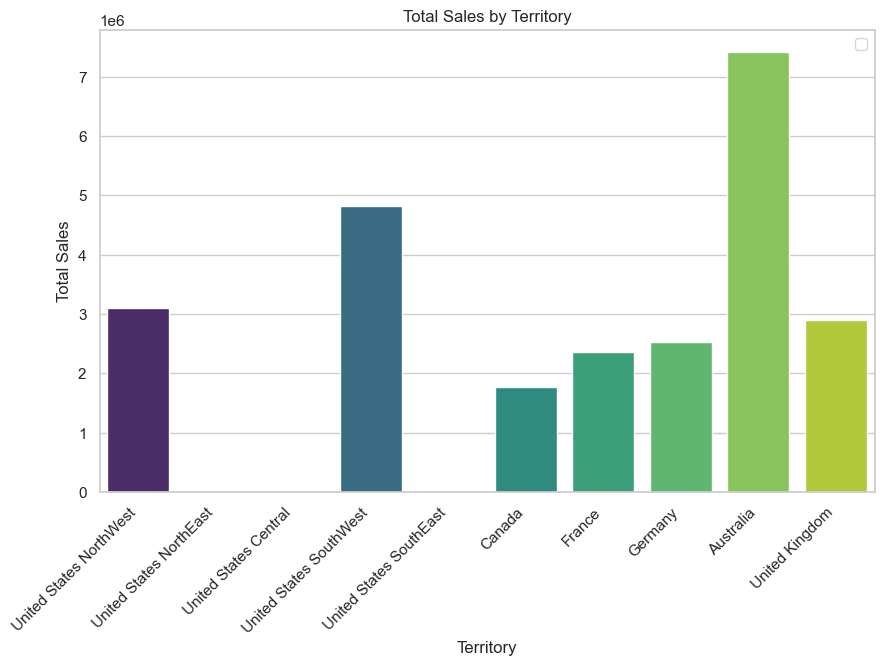

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=territory_sales_data, x='Region', y='TotalSales', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by Territory')
plt.legend()
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.show()

In [45]:
conn.close()